In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def confidence_interval(data):
    n = len(data)
    mean = np.mean(data)
    # ddof=1 for sample standard deviation
    std_dev = np.std(data, ddof=1)

    t_value = stats.t.ppf(0.975, df=n-1)  # 0.975 for a 95% CI
    margin_of_error = t_value * (std_dev / np.sqrt(n))
    
    # Returning the confidence interval as (lower, upper)
    return (float(mean - margin_of_error), float(mean + margin_of_error))


file_path = r"data\sama_2014-10-13\measurements_0347.csv"
df = pd.read_csv(file_path)
result = df.groupby(['Size', 'Type'])['Time'].apply(confidence_interval)

In [16]:
result

Size     Type        
100      "Built-in"      (1.1184285223017725e-05, 1.4015714776982274e-05)
         "Parallel"         (0.0031011201851889473, 0.004389679814811053)
         "Sequential"      (9.24471097896044e-06, 1.0355289021039559e-05)
1000     "Built-in"        (0.0002030393883353922, 0.0002125606116646078)
         "Parallel"            (0.013416068648487295, 0.0218071313515127)
         "Sequential"      (0.0001264398252386835, 0.0001291601747613165)
10000    "Built-in"        (0.0017049304850120565, 0.0017338695149879436)
         "Parallel"          (0.016236646086346007, 0.018645353913653996)
         "Sequential"      (0.0016378234649020316, 0.0017537765350979686)
100000   "Built-in"          (0.020250308985503788, 0.020564091014496206)
         "Parallel"            (0.04328728927266174, 0.05225031072733826)
         "Sequential"         (0.019714651452161395, 0.02006374854783861)
1000000  "Built-in"            (0.24148558411652898, 0.24304921588347106)
         "Parall

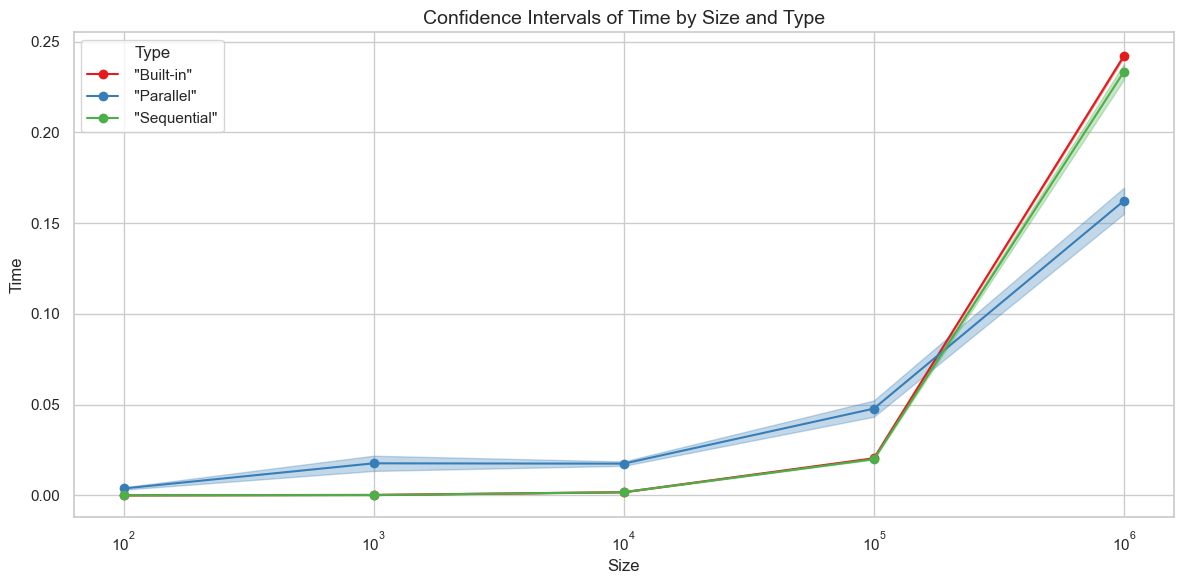

In [17]:
result_df = result.unstack() 
result_df = result_df.rename(columns={
    'Built-in': 'Built-in',
    'Parallel': 'Parallel',
    'Sequential': 'Sequential'
})

means_df = df.groupby(['Size', 'Type'])['Time'].mean().unstack()
means_df = means_df.rename(columns={
    'Built-in': 'Built-in',
    'Parallel': 'Parallel',
    'Sequential': 'Sequential'
})

x_values = means_df.index.values
types = means_df.columns

error_data = {}
for col in types:
    error_data[col] = {
        'lower': [],
        'upper': []
    }

for index, row in result_df.iterrows():
    for col in types:
        try:
            error_data[col]['lower'].append(row[col][0])
            error_data[col]['upper'].append(row[col][1])
        except (TypeError, IndexError):
            error_data[col]['lower'].append(np.nan)
            error_data[col]['upper'].append(np.nan)

# Plotting
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("Set1", len(types))
i = 0
for col in types:
    lower_bounds = error_data[col]['lower']
    upper_bounds = error_data[col]['upper']
    
    ax.fill_between(x_values, lower_bounds, upper_bounds, color=colors[i], alpha=0.3)
    ax.plot(x_values, means_df[col], '-o', label=col, color=colors[i])
    i += 1

ax.set_xlabel("Size", fontsize=12)
ax.set_ylabel("Time", fontsize=12)
ax.set_title("Confidence Intervals of Time by Size and Type", fontsize=14)
ax.set_xscale('log')
ax.legend(title="Type")
plt.tight_layout()
plt.show()
